In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
file_path = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Asegurar que isBestSeller sea entero
df['isBestSeller'] = df['isBestSeller'].astype(int)

# Crosstab entre categoría y estado de best-seller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['best_seller_ratio'] = crosstab[1] / (crosstab[0] + crosstab[1])
crosstab_sorted = crosstab.sort_values(by='best_seller_ratio', ascending=False)
print("Crosstab de categorías con best-seller ratio:")
print(crosstab_sorted)

Crosstab de categorías con best-seller ratio:
isBestSeller                       0    1  best_seller_ratio
category                                                    
Grocery                         9008  556           0.058135
Smart Home Security & Lighting    98    6           0.057692
Health & Personal Care          9017  552           0.057686
Mobile Phone Accessories         248   11           0.042471
Power & Hand Tools              8353  306           0.035339
...                              ...  ...                ...
Bedding Collections             6309    0           0.000000
CPUs                             249    0           0.000000
CD, Disc & Tape Players         8798    0           0.000000
Blank Media Cases & Wallets      243    0           0.000000
eBook Readers & Accessories      246    0           0.000000

[296 rows x 3 columns]



Chi-cuadrado: 36540.20270061387, p-valor: 0.0
Cramér's V: 0.08646709890892415


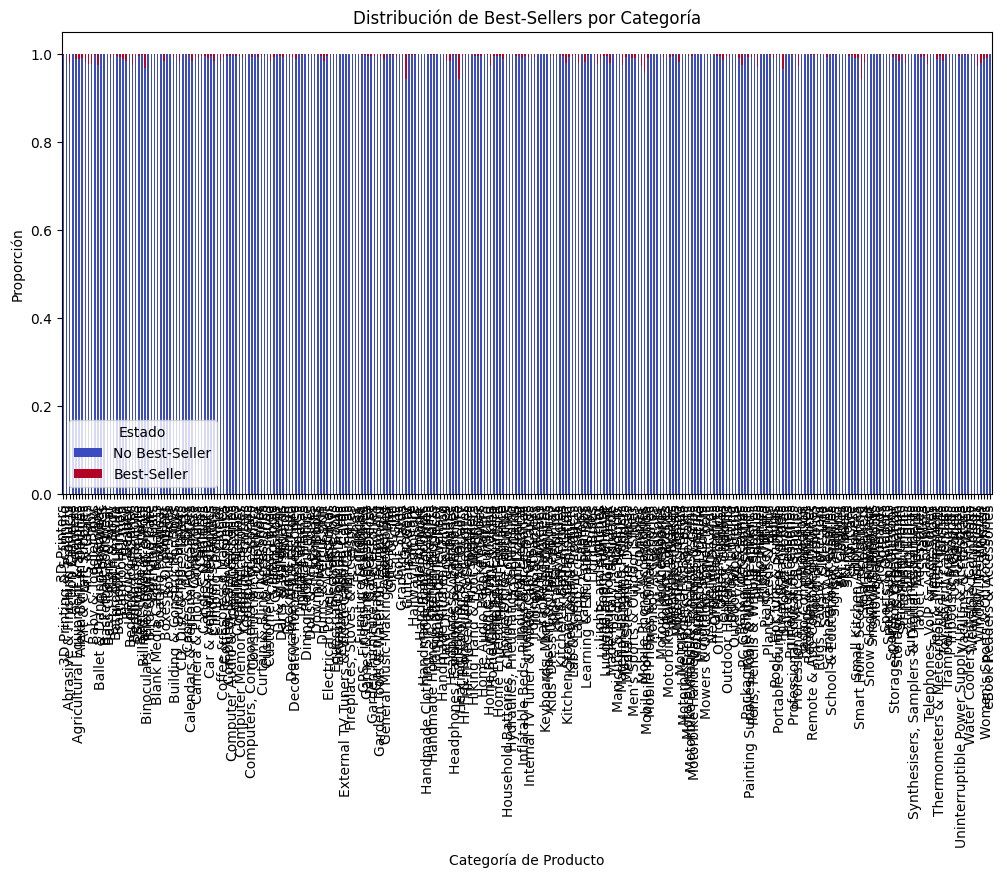

In [ ]:
# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])
print(f"\nChi-cuadrado: {chi2}, p-valor: {p}")

#Cramér's V
n = df.shape[0]
cramer_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramer_v}")

# gráfico de barras apiladas
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_normalized[[0, 1]].plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.xlabel("Categoría de Producto")
plt.ylabel("Proporción")
plt.title("Distribución de Best-Sellers por Categoría")
plt.legend(["No Best-Seller", "Best-Seller"], title="Estado")
plt.xticks(rotation=90)
plt.show()


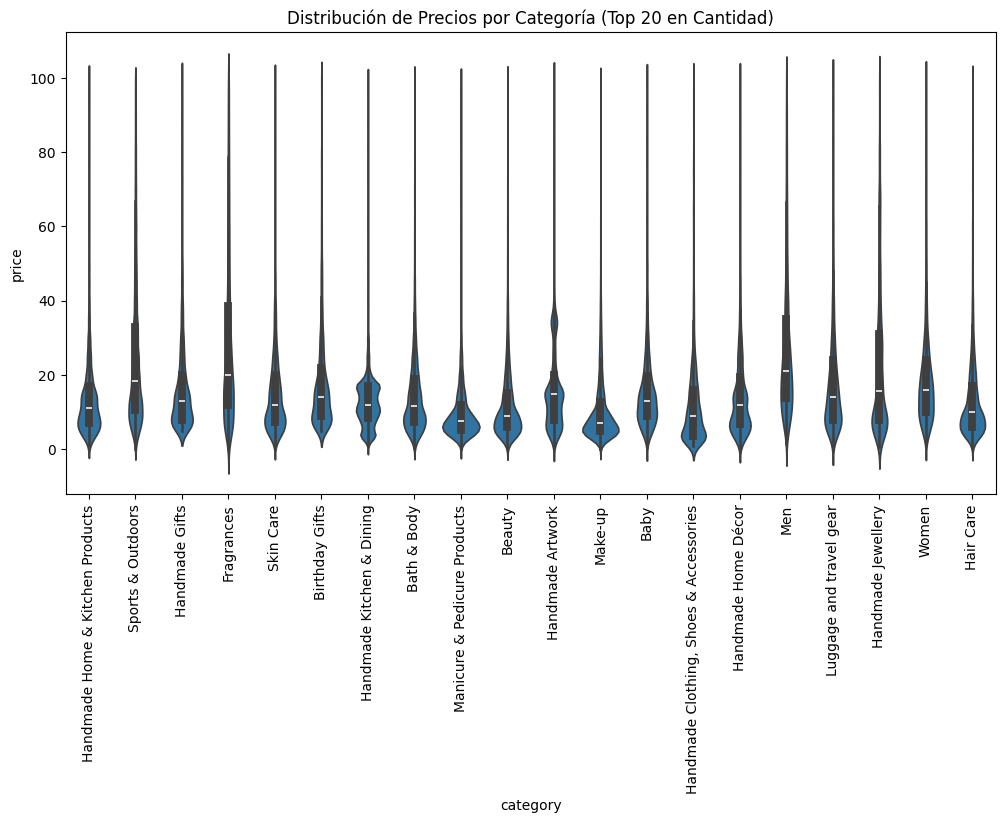

Categoría con mayor mediana de precios:
category
Desktop PCs    74.0
Name: price, dtype: float64


In [ ]:
# Eliminación de outliers IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Violin plot de precios por categoría (top 20 en cantidad)
top_20_categories = df_filtered['category'].value_counts().nlargest(20).index
plt.figure(figsize=(12,6))
sns.violinplot(data=df_filtered[df_filtered['category'].isin(top_20_categories)], x='category', y='price')
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Categoría (Top 20 en Cantidad)")
plt.show()

# Categoría con mayor mediana de precios
median_prices = df_filtered.groupby('category')['price'].median().sort_values(ascending=False)
print("Categoría con mayor mediana de precios:")
print(median_prices.head(1))

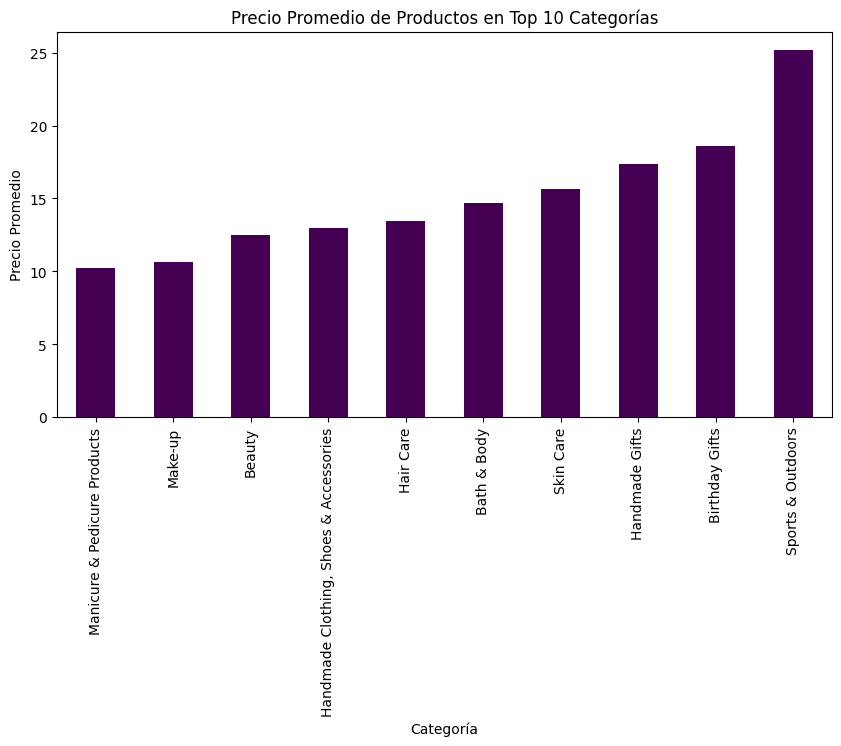

Categoría con mayor precio promedio:
Sports & Outdoors 25.17206487036301


In [21]:
# Gráfico de barras con precio promedio de productos en las 10 categorías principales
top_10_categories = df_filtered['category'].value_counts().nlargest(10).index
avg_prices = df_filtered[df_filtered['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values()
avg_prices.plot(kind='bar', figsize=(10,5), colormap='viridis')
plt.title("Precio Promedio de Productos en Top 10 Categorías")
plt.ylabel("Precio Promedio")
plt.xlabel("Categoría")
plt.xticks(rotation=90)
plt.show()

# Categoría con mayor precio promedio
print("Categoría con mayor precio promedio:")
print(avg_prices.idxmax(), avg_prices.max())

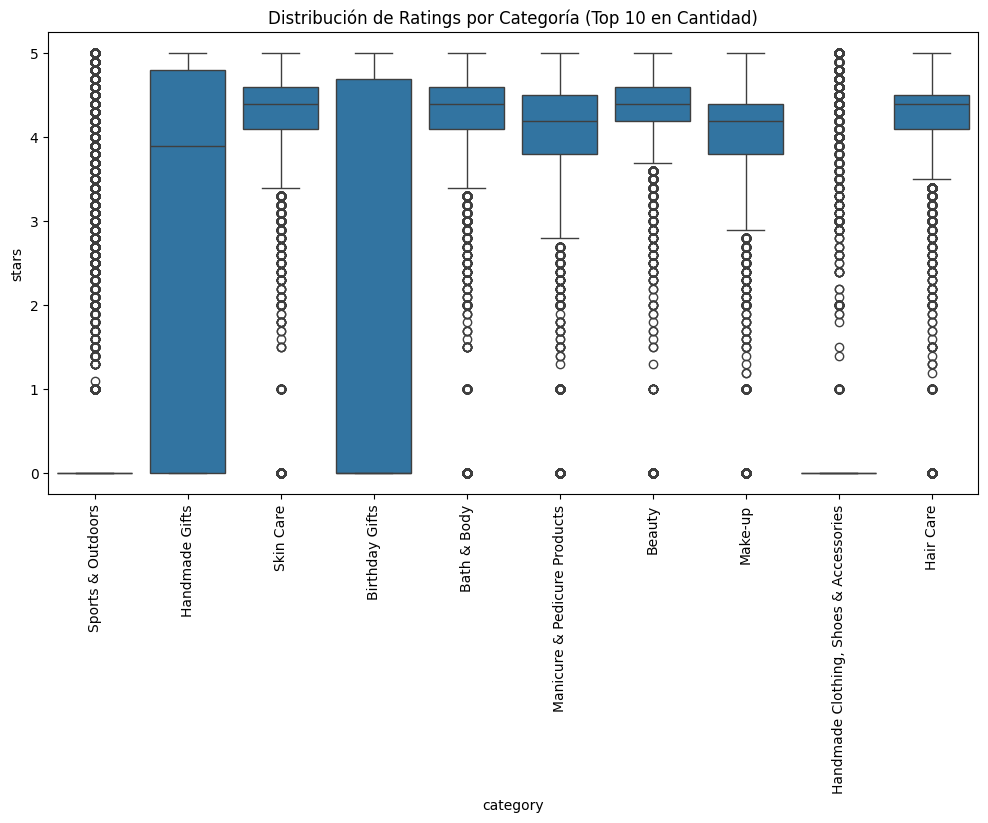

Categoría con mayor mediana de ratings:
category
Computer Memory    4.7
Name: stars, dtype: float64

Correlación entre precio y rating: -0.07767299878181261


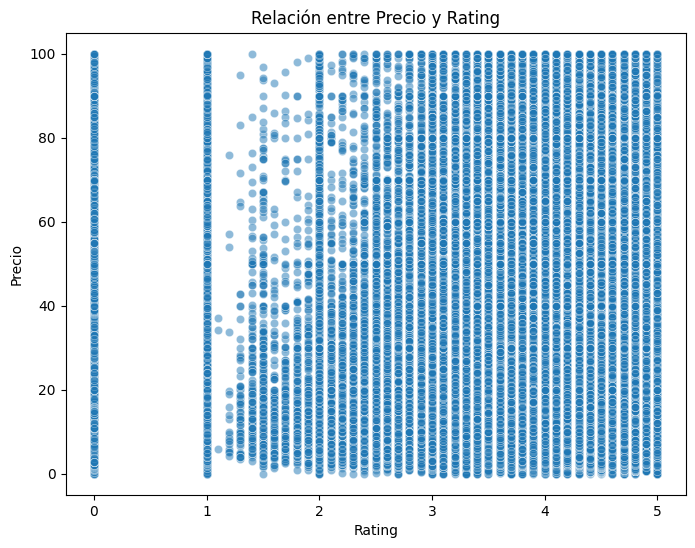

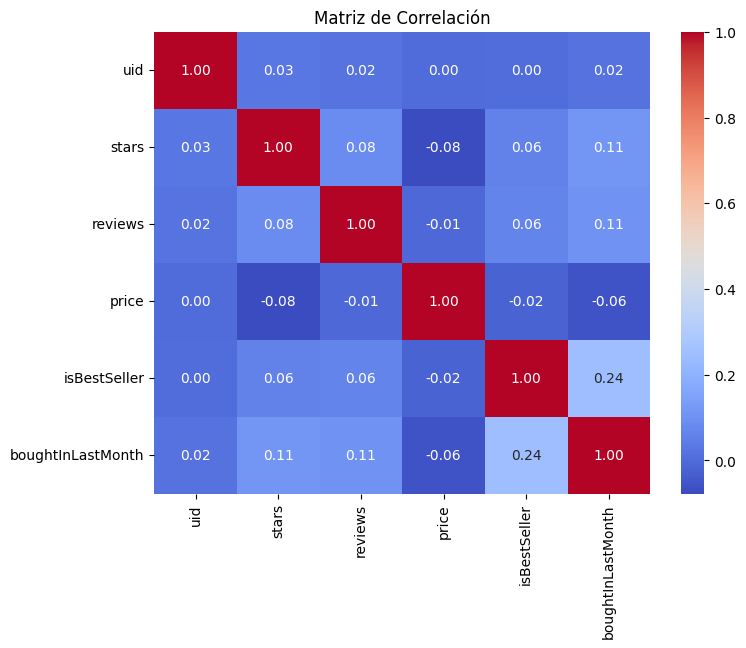

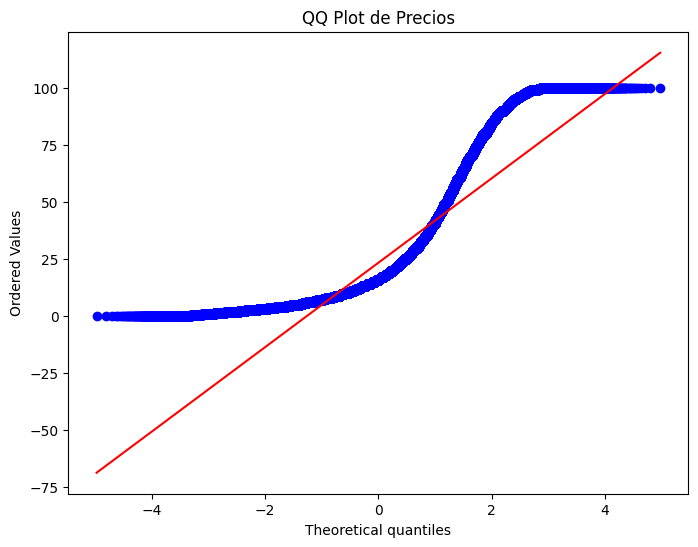

In [23]:
# Box plot de ratings por categoría (top 10 en cantidad)
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered[df_filtered['category'].isin(top_10_categories)], x='category', y='stars')
plt.xticks(rotation=90)
plt.title("Distribución de Ratings por Categoría (Top 10 en Cantidad)")
plt.show()

# Categoría con mayor mediana de ratings
median_ratings = df_filtered.groupby('category')['stars'].median().sort_values(ascending=False)
print("Categoría con mayor mediana de ratings:")
print(median_ratings.head(1))

# Correlación entre precio y rating
correlation = df_filtered[['price', 'stars']].corr().iloc[0, 1]
print(f"\nCorrelación entre precio y rating: {correlation}")

# Scatter plot de precio vs rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtered, x='stars', y='price', alpha=0.5)
plt.title("Relación entre Precio y Rating")
plt.xlabel("Rating")
plt.ylabel("Precio")
plt.show()

# Heatmap de correlaciones entre variables numéricas
numeric_cols = df_filtered.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# QQ plot de precios
plt.figure(figsize=(8,6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot de Precios")
plt.show()
